# Topic model visualizations

In [94]:
%matplotlib inline
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('doctopics.csv', header=None, index_col=0)

In [96]:
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
1914-1,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1914-2,0.000000,0.000000,0.000000,0.041237,0.154639,0.010309,0.000000,0.000000,0.000000,0.010309,...,0.000000,0.061856,0.030928,0.020619,0.000000,0.000000,0.000000,0.010309,0.000000,0.000000
1914-3,0.011364,0.000000,0.000000,0.000000,0.022727,0.090909,0.068182,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.056818,0.011364,0.000000,0.000000,0.000000,0.079545,0.000000
1914-4,0.000000,0.000000,0.000000,0.000000,0.060748,0.028037,0.000000,0.028037,0.084112,0.000000,...,0.042056,0.102804,0.009346,0.000000,0.000000,0.000000,0.009346,0.000000,0.000000,0.000000
1914-5,0.000000,0.000000,0.000000,0.000000,0.054545,0.000000,0.000000,0.000000,0.045455,0.072727,...,0.000000,0.000000,0.063636,0.000000,0.000000,0.063636,0.000000,0.009091,0.000000,0.018182
1914-6,0.000000,0.000000,0.000000,0.030303,0.000000,0.015152,0.020202,0.025253,0.055556,0.070707,...,0.000000,0.005051,0.000000,0.075758,0.030303,0.060606,0.020202,0.000000,0.000000,0.025253
1914-7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.175926,...,0.027778,0.000000,0.000000,0.000000,0.018519,0.009259,0.000000,0.000000,0.009259,0.000000
1914-8,0.000000,0.103659,0.030488,0.054878,0.000000,0.000000,0.000000,0.000000,0.024390,0.012195,...,0.000000,0.079268,0.000000,0.000000,0.024390,0.006098,0.000000,0.000000,0.067073,0.000000
1914-9,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.058824,0.039216,0.019608,...,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039216


In [97]:
df.columns = ['Welfare State', 'Ecology', 'Economy', 'Middle East', 'Knowledge'
, 'Nationalism', 'Security', 'Rhetorical Questions', 'War', 'Agriculture', 'Children & Education', 'Taxation', 'Money and War', 'War_2', 'Government', 'Oil', 'Law', 'Liberty', 'Public', 'Budget', 'United Nations', 'Nucelar Weapons', 'Federal Government', 'Rights', 'Economic Legislation']


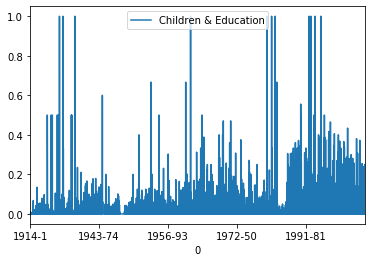

In [181]:
ax = df.plot.line(y=10)

In [99]:
# Looking at a single document
df.loc['1999-1', :]

Welfare State           0.000000
Ecology                 0.000000
Economy                 0.000000
Middle East             0.000000
Knowledge               0.000000
Nationalism             0.000000
Security                0.000000
Rhetorical Questions    0.000000
War                     0.000000
Agriculture             0.000000
Children & Education    0.000000
Taxation                0.000000
Money and War           0.000000
War_2                   0.000000
Government              0.000000
Oil                     0.615385
Law                     0.000000
Liberty                 0.000000
Public                  0.000000
Budget                  0.000000
United Nations          0.000000
Nucelar Weapons         0.000000
Federal Government      0.000000
Rights                  0.000000
Economic Legislation    0.000000
Name: 1999-1, dtype: float64

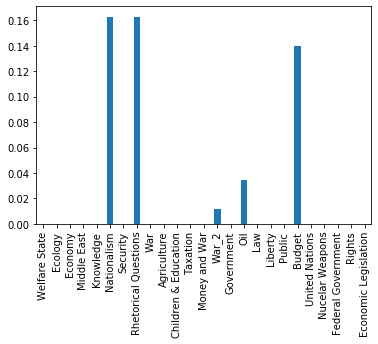

In [104]:
ax = df.loc['1988-1', :].plot.bar()
# ax.figure.savefig('/tmp/myplot.png')

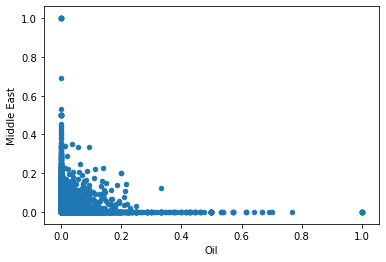

In [184]:
#boxplot([1,2,3,4,5,10], showfliers=False)

ax = df.plot.scatter(15, 3)
# ax.figure.savefig('/tmp/myplot.png')

In [163]:
df.plt.scatter.xscale('log')
plt.yscale('log')

plt.show()

AttributeError: 'DataFrame' object has no attribute 'plt'

In [19]:
# We can look up the label of particular outliers by sorting the table.
# See the outlier for topic 5 on the bottom;
# pass by=[9] to see the outlier for topic 9.
df.sort_values(by=['Agriculture', 'Nationalism'])

,Welfare State,Ecology,Economy,Middle East,Knowledge,Nationalism,Security,Rhetorical Questions,War,Agriculture,...,Oil,Law,Liberty,Public,Budget,United Nations,Nucelar Weapons,Federal Government,Rights,Economic Legislation
0,,,,,,,,,,,,,,,,,,,,,
1914-1,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1914-17,0.000000,0.000000,0.000000,0.000000,0.172414,0.000000,0.000000,0.000000,0.068966,0.000000,...,0.000000,0.172414,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000
1914-18,0.000000,0.007407,0.000000,0.000000,0.044444,0.000000,0.000000,0.022222,0.000000,0.000000,...,0.000000,0.059259,0.007407,0.051852,0.014815,0.000000,0.000000,0.000000,0.037037,0.000000
1914-19,0.000000,0.007299,0.000000,0.029197,0.032847,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.120438,0.000000,0.058394,0.003650,0.058394,0.000000,0.000000,0.000000,0.000000
1914-21,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.230769,0.000000,...,0.038462,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000
1914-22,0.000000,0.029412,0.000000,0.066176,0.029412,0.000000,0.000000,0.000000,0.139706,0.000000,...,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.044118,0.007353,0.022059,0.007353
1914-23,0.000000,0.000000,0.009091,0.000000,0.127273,0.000000,0.000000,0.018182,0.181818,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.036364,0.009091,0.000000,0.063636,0.000000
1914-24,0.000000,0.000000,0.000000,0.026217,0.000000,0.000000,0.000000,0.000000,0.022472,0.000000,...,0.000000,0.033708,0.134831,0.000000,0.000000,0.078652,0.000000,0.000000,0.131086,0.000000
1914-26,0.000000,0.118774,0.000000,0.000000,0.045977,0.000000,0.000000,0.007663,0.030651,0.000000,...,0.000000,0.065134,0.003831,0.000000,0.003831,0.000000,0.007663,0.015326,0.065134,0.000000


In [87]:
# there are also data points which score high on *both* topics
# we can find them by adding the topic values together and sorting on that.
(df['Middle East'] + df['War']).sort_values()

0
1964-41     0.000000
1968-160    0.000000
1968-159    0.000000
1968-155    0.000000
1968-152    0.000000
1968-151    0.000000
1968-150    0.000000
1968-148    0.000000
1968-147    0.000000
1968-146    0.000000
1968-144    0.000000
1968-143    0.000000
1968-165    0.000000
1968-142    0.000000
1968-139    0.000000
1968-138    0.000000
1968-136    0.000000
1968-135    0.000000
1968-134    0.000000
1968-133    0.000000
1968-132    0.000000
1968-131    0.000000
1968-130    0.000000
1968-129    0.000000
1968-128    0.000000
1968-141    0.000000
1968-126    0.000000
1968-167    0.000000
1968-169    0.000000
1969-35     0.000000
              ...   
1999-8      0.500000
1924-34     0.500000
1924-76     0.500000
1995-2      0.500000
1995-39     0.500000
1968-58     0.500000
1946-420    0.500000
1925-5      0.500000
1981-590    0.500000
1965-88     0.500000
1927-69     0.500000
1981-653    0.500000
1954-18     0.529412
1945-14     0.533333
1948-105    0.600000
1949-26     0.600000
1948-102   

In [88]:
# Notice that are labels have structure: they consist of both a year and a speech number
# If we want to select speeches by year and compute aggregate statistics for them,
# we have to split up the label (here we split on the dash '-' in the labels):
df.index = pd.MultiIndex.from_tuples(k.split('-') for k, v in df.iterrows())

In [89]:
df

Welfare State   Ecology   Economy  Middle East  Knowledge  \
1914 1        0.000000  0.000000  0.000000     0.250000   0.000000   
     2        0.000000  0.000000  0.000000     0.041237   0.154639   
     3        0.011364  0.000000  0.000000     0.000000   0.022727   
     4        0.000000  0.000000  0.000000     0.000000   0.060748   
     5        0.000000  0.000000  0.000000     0.000000   0.054545   
     6        0.000000  0.000000  0.000000     0.030303   0.000000   
     7        0.000000  0.000000  0.000000     0.000000   0.000000   
     8        0.000000  0.103659  0.030488     0.054878   0.000000   
     9        0.000000  0.000000  0.000000     0.000000   0.117647   
     10       0.000000  0.000000  0.000000     0.000000   0.000000   
     11       0.000000  0.000000  0.000000     0.006452   0.000000   
     12       0.000000  0.005848  0.099415     0.011696   0.064327   
     13       0.011765  0.023529  0.052941     0.000000   0.041176   
     14       0.000000  0.000000  0.108844     0.000000   0.006803   
     15       0.000000  0.000000  0.000000     0.000000   0.000000   
     16       0.000000  0.000000  0.004405     0.000000   0.017621   
     17       0.000000  0.000000  0.000000     0.000000   0.172414   
     18       0.000000  0.007407  0.000000     0.000000   0.044444   
     19       0.000000  0.007299  0.000000     0.029197   0.032847   
     20       0.000000  0.000000  0.000000     0.000000   0.080357   
     21       0.000000  0.076923  0.000000     0.000000   0.000000   
     22       0.000000  0.029412  0.000000     0.066176   0.029412   
     23       0.000000  0.000000  0.009091     0.000000   0.127273   
     24       0.000000  0.000000  0.000000     0.026217   0.000000   
     25       0.000000  0.030303  0.000000     0.000000   0.022727   
     26       0.000000  0.118774  0.000000     0.000000   0.045977   
     27       0.000000  0.000000  0.000000     0.000000   0.113636   
     28       0.000000  0.007752  0.000000     0.031008   0.046512   
     29       0.000000  0.018634  0.000000     0.018634   0.037267   
     30       0.000000  0.000000  0.000000     0.000000   0.011561   
...                ...       ...       ...          ...        ...   
2009 65       0.169492  0.000000  0.050847     0.000000   0.000000   
     66       0.070423  0.028169  0.000000     0.000000   0.014085   
     67       0.000000  0.043478  0.010870     0.000000   0.000000   
     68       0.000000  0.000000  0.033708     0.000000   0.022472   
     69       0.000000  0.000000  0.000000     0.000000   0.000000   
     70       0.000000  0.000000  0.000000     0.000000   0.000000   
     71       0.000000  0.000000  0.066667     0.000000   0.000000   
     72       0.092784  0.000000  0.000000     0.041237   0.051546   
     73       0.000000  0.000000  0.021505     0.000000   0.096774   
     74       0.438596  0.000000  0.000000     0.000000   0.000000   
     75       0.000000  0.000000  0.000000     0.027027   0.027027   
     76       0.000000  0.000000  0.000000     0.000000   0.000000   
     77       0.000000  0.000000  0.000000     0.195122   0.000000   
     78       0.055556  0.018519  0.009259     0.000000   0.000000   
     79       0.000000  0.000000  0.000000     0.074468   0.010638   
     80       0.000000  0.013889  0.027778     0.000000   0.000000   
     81       0.000000  0.000000  0.066667     0.100000   0.050000   
     82       0.000000  0.000000  0.169231     0.000000   0.000000   
     83       0.000000  0.000000  0.000000     0.000000   0.000000   
     84       0.000000  0.020833  0.000000     0.000000   0.041667   
     85       0.000000  0.000000  0.000000     0.043478   0.304348   
     86       0.000000  0.000000  0.000000     0.000000   0.050000   
     87       0.000000  0.000000  0.000000     0.000000   0.294118   
     88       0.013889  0.111111  0.027778     0.000000   0.152778   
     89       0.030534  0.022901  0.015267     0.000000   0.244275   
     90       0.000

In [90]:
# Average topic weights by year:
df.mean(level=0)

,Welfare State,Ecology,Economy,Middle East,Knowledge,Nationalism,Security,Rhetorical Questions,War,Agriculture,...,Oil,Law,Liberty,Public,Budget,United Nations,Nucelar Weapons,Federal Government,Rights,Economic Legislation
1914,0.000771,0.014318,0.010173,0.018860,0.043489,0.013270,0.007231,0.020107,0.054714,0.024009,...,0.012851,0.044300,0.018473,0.018661,0.007674,0.019470,0.003797,0.004222,0.028007,0.006865
1915,0.007883,0.022960,0.007606,0.013764,0.018180,0.009184,0.024335,0.006995,0.033637,0.031901,...,0.023485,0.067084,0.018149,0.019335,0.005849,0.018403,0.003571,0.004637,0.030466,0.006517
1916,0.002405,0.003520,0.007035,0.013341,0.011890,0.010469,0.002130,0.014016,0.012183,0.007130,...,0.021481,0.113815,0.016657,0.056500,0.007669,0.014211,0.009735,0.006554,0.022533,0.029307
1917,0.002362,0.005291,0.006517,0.019015,0.028857,0.008576,0.009559,0.012233,0.057803,0.004355,...,0.013169,0.062325,0.037072,0.012395,0.005802,0.030552,0.005430,0.007475,0.059319,0.012563
1918,0.003431,0.016442,0.007364,0.016947,0.017412,0.022550,0.002132,0.015449,0.036295,0.018077,...,0.008538,0.062731,0.013820,0.032880,0.006560,0.032090,0.006898,0.006798,0.010315,0.012236
1919,0.007279,0.008190,0.012138,0.003557,0.010505,0.009817,0.005071,0.011305,0.024842,0.028938,...,0.021234,0.087980,0.021148,0.041695,0.004871,0.019880,0.004914,0.019258,0.019827,0.033996
1920,0.008356,0.004062,0.005450,0.021429,0.003028,0.017171,0.005171,0.012807,0.043635,0.008452,...,0.007007,0.050250,0.020818,0.061958,0.007261,0.023322,0.000859,0.003277,0.034276,0.022805
1921,0.006181,0.008657,0.022195,0.007172,0.015293,0.007958,0.012830,0.011065,0.010798,0.023109,...,0.017381,0.078068,0.015800,0.046249,0.007542,0.022692,0.002349,0.016790,0.017390,0.037527
1922,0.005495,0.008124,0.020102,0.005862,0.015466,0.014930,0.012579,0.010741,0.024445,0.035361,...,0.022887,0.055278,0.017412,0.080136,0.004835,0.028846,0.006977,0.015331,0.020985,0.025291
1923,0.020563,0.027475,0.010063,0.003662,0.003670,0.006233,0.009825,0.007586,0.007644,0.042429,...,0.008228,0.098638,0.012931,0.092094,0.007844,0.033598,0.012662,0.041863,0.021979,0.067946


In [172]:
# Do something a bit more advanced:
# Apply PCA to the mean topic weights for each year.
pca = decomposition.PCA(n_components=2)
meanweights = df.mean(level=0)
reduced = pca.fit_transform(meanweights)
result = pd.DataFrame(reduced, index=meanweights.index, columns=['PC1', 'PC2'])

In [29]:
result

,PC1,PC2
1914,0.020550,-0.021914
1915,0.039266,-0.010795
1916,0.091269,-0.056808
1917,0.023986,-0.012411
1918,0.045385,-0.026489
1919,0.069039,-0.030817
1920,0.057405,-0.019647
1921,0.076723,-0.030383
1922,0.074554,-0.030673
1923,0.115291,-0.034229


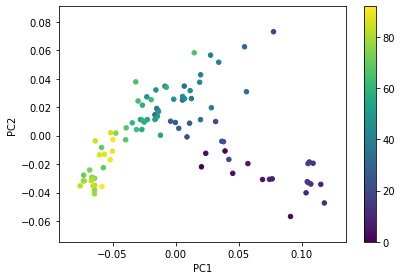

In [30]:
# Plot the results in a scatter plot
# We add a colormap so that the change over time is visualized.
fig, ax = plt.subplots()
result.plot.scatter('PC1', 'PC2', c=range(len(result)), colormap='viridis', ax=ax)
fig.tight_layout()
# fig.savefig('/tmp/myplot.png')

# It seems that PC1 represents a sequential change
# while PC2 represents a cyclical change (the start is similar to the beginning).
# Interesting!

In [ ]:
pca = decomposition.PCA(n_components=2)
meanweights = df.mean(level=0)
reduced = pca.fit_transform(meanweights)
result = pd.DataFrame(reduced, index=meanweights.index, columns=['PC1', 'PC2'])

fig, ax = plt.subplots()
result.plot.scatter('PC1', 'PC2', c=range(len(result)), colormap='viridis', ax=ax)
fig.tight_layout()